In [1]:
%matplotlib inline
import pandas as pn
import numpy as np
import csv

In [5]:
logs = pn.read_csv("logs_enhanced.csv")
users = logs['users']
users_v_messages = users.value_counts()
#users_v_messages.plot(x = 'number of users', y ='number of messages',kind = 'hist')
sd = users_v_messages.std()
mean = users_v_messages.mean()
#users_v_messages.plot(kind = 'box')
#users_v_messages.sum()
users_v_messages

jennkunz (U0MNSUSKX)           1033
joaocorreia (U03PCB2GE)         870
mgershoff (U2JHKTM8T)           785
andrew.r (U2YSPDZP1)            783
soulshaolin (U11A92MD0)         745
pawelk (U06DY96TX)              607
michelejkiss (U03A8AV32)        572
toddbullivant (U349EMRLM)       557
tony (U2GC2BM3R)                556
sleepless_sf (U10ADD5BJ)        539
yuhui (U2Y1ZG3C3)               532
ericmatisoff (U03ANLRLM)        522
jason__charles (U0JPAJ5F0)      521
seth (U224G9N1H)                502
lukas.oldenburg (U1V7GT4PQ)     488
prolet (U1DNJKD4N)              468
jack (U0X7169QT)                443
leeisensee (U031USB3P)          406
mjgoldsmith (U2289HSG3)         389
holomarked (U03B28C4T)          389
tgwilson (U03A70QL9)            377
mattytwoshoes (U2FQWM0FQ)       374
oarsi (U0Q4JP9FX)               319
arob (U2YSPDZP1)                313
benjamingaines (U03AH0B33)      294
brianau (U03B1HRK0)             290
smalls (U03A89WJG)              274
moemkiss (U0792P79S)        

In [ ]:
logs['channel'].value_counts()

In [ ]:
users.describe()

In [3]:
#final_list = [x for x in arr if (x > mean - 2 * sd)]
#final_list = [x for x in final_list if (x < mean + 2 * sd)]


filtered_users = []
for item in users_v_messages.iteritems():
    if(item[1] < (mean + 2*sd) and item[1] > (mean - 2*sd) ):
        #print item
        filtered_users.append(item[0])
        
len(filtered_users)

910

In [ ]:
logs['users'].describe()

In [4]:
logs_filtered = logs[logs['users'].isin(filtered_users)]
#users_asking = logs_filtered.loc[(logs_filtered['num_questions'] > 0), 'users']
#users_asking.value_counts()
filtered_users_series = logs_filtered['users'].value_counts()
#filtered_users_series.plot(kind = 'box')
#filtered_users_series.describe()
#filtered_users_series.sum()

logs_filtered.to_csv('logs_filtered.csv', index = False)

Text(0,0.5,u'number of users falling the range')

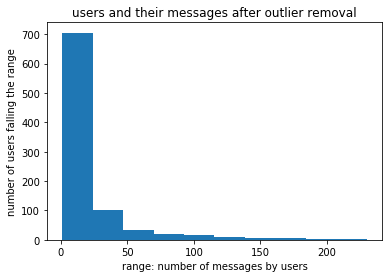

In [8]:
logs_filtered = pn.read_csv('logs_filtered.csv', engine = 'python')
users_messages = logs_filtered['users']
messages_count = users_messages.value_counts()
plot = messages_count.plot(kind = 'hist', title = 'users and their messages after outlier removal')
plot.set_xlabel('range: number of messages by users')
plot.set_ylabel('number of users falling the range')

In [ ]:
users = logs.loc[(logs['channel'] == 'google-gtm (C2PNCCZ1V)'), 'users']
users_count = users.value_counts()
plot = users_count.plot(kind = 'hist', title = 'before outlier removal in Google GTM')
plot.set_xlabel('range: number of messages by users')
plot.set_ylabel('number of users falling in range')

In [ ]:
users = logs_filtered.loc[(logs_filtered['channel'] == 'google-gtm (C2PNCCZ1V)'), 'users']
users_count = users.value_counts()
plot = users_count.plot(kind = 'hist', title = 'after outlier removal in Google GTM')
plot.set_xlabel('range: number of messages by users')
plot.set_ylabel('number of users falling in range')

In [ ]:
channels = logs_filtered['users']
channels.describe()

In [ ]:
users = logs_filtered.loc[(logs_filtered['channel'] == 'conferences (C03A92FM6)', 'users')]
users.describe()

In [9]:
filtered_ranking = logs_filtered['channel'].value_counts()
filtered_ranking

adobe-analytics (C03AFUKHC)       3923
google-analytics (C03AE85U5)      3219
measure (C031USB3Z)               2407
adobe-dtm (C2PN1PYA2)             1262
google-gtm (C2PNCCZ1V)             991
r-and-statistics (C07AFPUA0)       799
testing (C03A5KC5F)                708
blogs-and-podcasts (C03FZMX4T)     587
conferences (C03A92FM6)            572
lobby-bar (C031USB41)              558
job-postings (C03BWP4QJ)           509
data-viz (C03JMFY5U)               502
bi-tools (C07AF8DH6)               459
women-in-analytics (C20HQRV9V)     455
data-science (C07AFPUA0)           367
NO                                 352
0                                  333
seo-sem (C03B1QXCB)                143
app-analytics (C4ZEXTF19)           96
adobe-summit-2017 (C4H5E66N5)       90
daa (C0GNTDNHW)                     50
1                                   22
mobile (C4ZEXTF19)                  15
emetrics-sf-2017 (C5DQMM5PZ)        12
YES                                  4
slack-how-to (C03BHDKGD) 